# PREPROCESSING

## Load data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
from scipy.stats import norm
import random as rand
import pickle

# Environment settings
data_path = 'Data/'
    
# Deserialize previously saved data from "data-visualization"
dataframes = {}
for df_name in ['test', 'train']:
    with open(data_path+df_name+'_dv.obj', 'rb') as file:
        dataframes[df_name] = pickle.load(file)

## Preprocess

In [2]:
# Remove columns & missing value rows
for df_name, df in dataframes.items():
    df = df.drop(['Ticket','Cabin'], axis=1)

In [3]:
# Transform category data into numerical
# hack for seaborn heatmap (no support for categorical values)
for df_name, df in dataframes.items():
    df['Sex'] = [0 if x == 'male' else 1 for x in df['Sex']]

Number of missing 'Age' points is 0


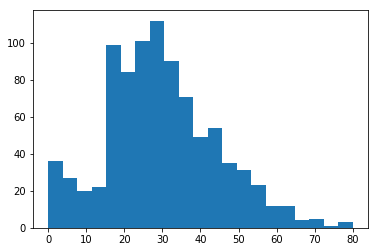

In [4]:
# Replace Age missing values with data generated from gaussian
np.random.seed(666)

for df_name, df in dataframes.items():
    # create gaussian with available da
    nan_filter = df['Age'].isna()
    mu, sigma = norm.fit(df[-nan_filter]['Age'])
    norm_dist = np.random.normal(mu, sigma, nan_filter.sum())
    df.loc[nan_filter,'Age'] = norm_dist
    
    # set to zero all ages below zero
    df.loc[df.Age<0, 'Age'] = 0

# Plot histogram of the gaussian distribution of the age
plt.hist(dataframes['train']['Age'], bins='auto')
print("Number of missing 'Age' points is {}".format(dataframes['train']['Age'].isna().sum()))

## Save data

In [5]:
# Serialize dataframes for later use in implementations
for df_name, df in dataframes.items():
    with open(data_path+df_name+'_pp.obj', 'wb') as file:
        pickle.dump(df, file)